In [16]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
data_loc = '../dades/'

In [4]:
trucades_salvament= pd.read_csv(data_loc + 'Dades_d_incidents_operatius_gestionats_pel_CAT112_20231110.csv' )
trucades_filtrades= trucades_salvament[(trucades_salvament["ANY"]<2023) & (trucades_salvament["ANY"]>2017)]

df= trucades_filtrades.sort_values(by="TIPUS",ascending=True)

# show loaded table:
df_meteo = df[trucades_filtrades["TIPUS"] == "Incendi"]
df_meteo

C:\Users\Imma\AppData\Local\Temp\ipykernel_13220\2917701103.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_meteo = df[trucades_filtrades["TIPUS"] == "Incendi"]


,ANY,MES,PROVINCIA,COMARCA,MUNICIPI,TIPUS,INCIDENTS
196983,2020,4,LLEIDA,NOGUERA,AGER,Incendi,1
199834,2020,3,BARCELONA,VALLES OCCIDENTAL,BADIA DEL VALLES,Incendi,3
310463,2018,2,BARCELONA,VALLES ORIENTAL,SANT ANTONI DE VILAMAJOR,Incendi,2
197397,2020,4,BARCELONA,VALLES ORIENTAL,LLIÇA D'AMUNT,Incendi,2
200099,2020,3,LLEIDA,URGELL,VILAGRASSA,Incendi,3
...,...,...,...,...,...,...,...
96805,2022,2,GIRONA,ALT EMPORDA,CASTELLO D'EMPURIES,Incendi,10
97186,2022,2,GIRONA,SELVA,LLORET DE MAR,Incendi,8
134828,2021,6,BARCELONA,MARESME,SANT ANDREU DE LLAVANERES,Incendi,8
73031,2022,7,BARCELONA,BAIX LLOBREGAT,SANTA COLOMA DE CERVELLO,Incendi,3


In [7]:
incendis = df_meteo.copy()
incendis= pd.DataFrame(incendis.groupby(['COMARCA'])['INCIDENTS'].sum()).reset_index()
incendis

,COMARCA,INCIDENTS
0,ALT CAMP,2209
1,ALT EMPORDA,5162
2,ALT PENEDES,3096
3,ALT URGELL,735
4,ALTA RIBAGORÇA,174
5,ANOIA,3094
6,BAGES,3663
7,BAIX CAMP,6419
8,BAIX EBRE,2287
9,BAIX EMPORDA,4105


In [11]:
data_dir= '../dades/'
cat = gpd.read_file(data_dir + "divisions-administratives-v2r1-comarques-100000-20220801.shx")
cat.rename(columns = {'NOMCOMAR':'COMARCA'}, inplace = True)
cat.rename(columns = {'CODICOMAR':'CODI_COMARCA'}, inplace = True)
cat.head()

,CODI_COMARCA,COMARCA,CAPCOMAR,AREAC5000,geometry
0,01,Alt Camp,Valls,537.6317,"POLYGON ((373635.755 4592021.079, 373669.333 4..."
1,02,Alt Empordà,Figueres,1356.6431,"MULTIPOLYGON (((514495.140 4662167.740, 514492..."
2,03,Alt Penedès,Vilafranca del Penedès,592.5498,"POLYGON ((385914.163 4595999.962, 386085.364 4..."
3,04,Alt Urgell,la Seu d'Urgell,1447.2028,"MULTIPOLYGON (((360736.000 4649167.000, 360624..."
4,05,Alta Ribagorça,el Pont de Suert,427.2234,"POLYGON ((326572.730 4721574.001, 326622.339 4..."


In [12]:
mapa=cat.copy()

from unidecode import unidecode
      
def quitar_acentos(cadena):
    # Reemplazar 'ç' por un marcador temporal
    cadena_con_marcador = cadena.replace('ç', '___cedilla___')
    # Aplicar unidecode y luego revertir el marcador temporal
    cadena_sin_acentos = unidecode(cadena_con_marcador).replace('___cedilla___', 'ç')
    
    return cadena_sin_acentos

mapa['COMARCA'] = mapa['COMARCA'].apply(quitar_acentos)

mapa['COMARCA'] = mapa['COMARCA'].str.upper()
mapa.head()

,CODI_COMARCA,COMARCA,CAPCOMAR,AREAC5000,geometry
0,01,ALT CAMP,Valls,537.6317,"POLYGON ((373635.755 4592021.079, 373669.333 4..."
1,02,ALT EMPORDA,Figueres,1356.6431,"MULTIPOLYGON (((514495.140 4662167.740, 514492..."
2,03,ALT PENEDES,Vilafranca del Penedès,592.5498,"POLYGON ((385914.163 4595999.962, 386085.364 4..."
3,04,ALT URGELL,la Seu d'Urgell,1447.2028,"MULTIPOLYGON (((360736.000 4649167.000, 360624..."
4,05,ALTA RIBAGORÇA,el Pont de Suert,427.2234,"POLYGON ((326572.730 4721574.001, 326622.339 4..."


In [14]:
mapa_plot=pd.merge(mapa,incendis,on=['COMARCA'])
mapa_plot

,CODI_COMARCA,COMARCA,CAPCOMAR,AREAC5000,geometry,INCIDENTS
0,01,ALT CAMP,Valls,537.6317,"POLYGON ((373635.755 4592021.079, 373669.333 4...",2209
1,02,ALT EMPORDA,Figueres,1356.6431,"MULTIPOLYGON (((514495.140 4662167.740, 514492...",5162
2,03,ALT PENEDES,Vilafranca del Penedès,592.5498,"POLYGON ((385914.163 4595999.962, 386085.364 4...",3096
3,04,ALT URGELL,la Seu d'Urgell,1447.2028,"MULTIPOLYGON (((360736.000 4649167.000, 360624...",735
4,05,ALTA RIBAGORÇA,el Pont de Suert,427.2234,"POLYGON ((326572.730 4721574.001, 326622.339 4...",174
5,06,ANOIA,Igualada,867.0471,"POLYGON ((370158.839 4628885.052, 370282.509 4...",3094
6,07,BAGES,Manresa,1092.7982,"POLYGON ((417259.067 4646530.811, 417513.903 4...",3663
7,08,BAIX CAMP,Reus,696.4883,"MULTIPOLYGON (((335052.970 4547018.980, 335051...",6419
8,09,BAIX EBRE,Tortosa,1001.9306,"MULTIPOLYGON (((311847.200 4514855.880, 311833...",2287
9,10,BAIX EMPORDA,la Bisbal d'Empordà,701.1353,"MULTIPOLYGON (((497966.430 4622427.830, 497965...",4105


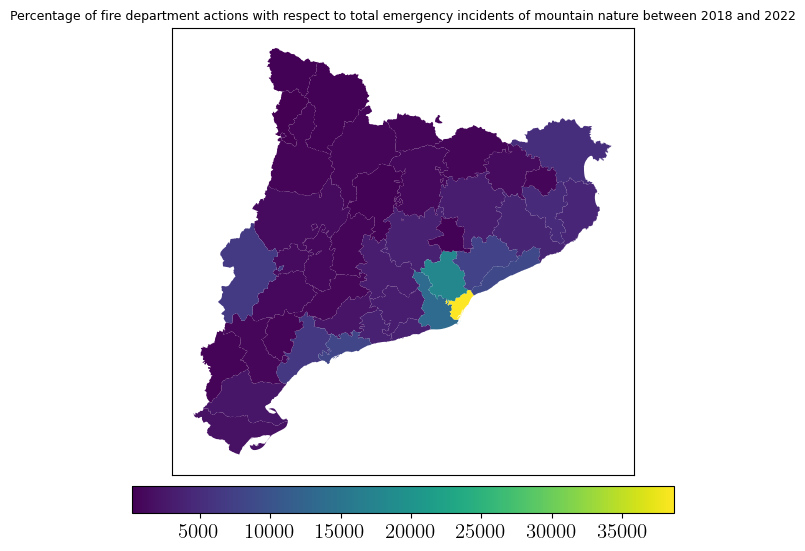

In [17]:
#highlight the counties with most rescue actions
# colors = {"Baix Llobregat":'darkorange',
#           "Vallès Occidental":'cornflowerblue',
#           "Val d'Aran":'mediumorchid',
#           "Ripollès":'royalblue',
#           "Berguedà":'darkred'}

fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.set_xticks([])
ax.set_yticks([])
plt.rc('text', usetex = True)
plt.rc('font', family='serif')
mapa_plot.plot(column = 'INCIDENTS',
                                  ax=ax,
                                  legend=True,
                                  cmap='viridis',
                                  legend_kwds={'orientation': "horizontal", 'pad': 0.02})
merged_rescue_tot_gpd =mapa_plot.set_index("COMARCA")
#merged_rescue_tot_gpd.loc[list(colors.keys()),:].boundary.plot(ax=ax,color=list(colors.values()))
merged_rescue_tot_gpd = merged_rescue_tot_gpd.reset_index()
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=15)
ax.set_title(r'Percentage of fire department actions with respect to total emergency incidents of mountain nature between 2018 and 2022', fontsize = 9)
#plt.savefig('figures/fire_over_incident.pdf')
plt.show()